## Performance Comparison
-------------------------

Refer to the README for steps on how to run this notebook.

The only parameters the user needs to modify are `ARES_RMSE` and `LEADERBOARD`, in the first cell.

In [13]:
ARES_RMSE = 12.4
LEADERBOARD = "concrete_leaderboard.csv"

In [14]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

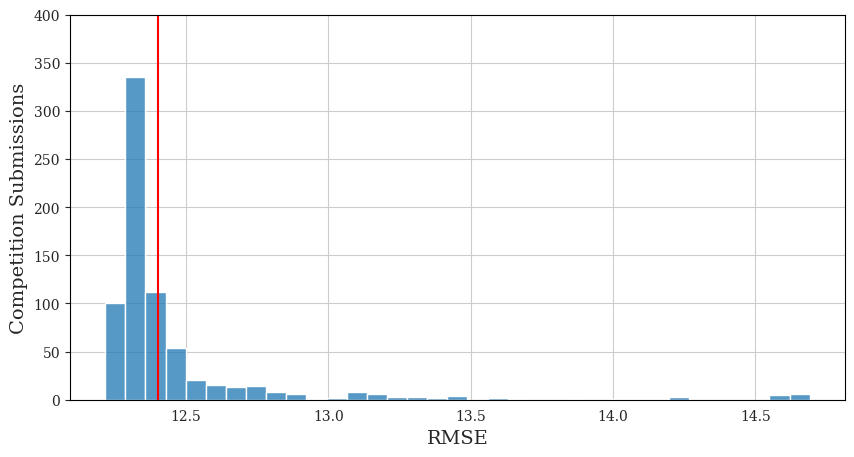

In [15]:
path = Path("../../datasets/kaggle_leaderboards") / LEADERBOARD
output_name = "housing_distr.png"

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
CHONK_SIZE = 24

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE, facecolor="xkcd:black")
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE, facecolor="xkcd:white", edgecolor="xkcd:black") #  powder blue
    
sns.set_style("whitegrid", {'font.family':['serif'], 'axes.edgecolor':'black','ytick.left': True})

fig, ax = plt.subplots(figsize=(10, 5))
df = pd.read_csv(path, index_col=0, header=0)
scores = df["Score"].values
sns.histplot(x=scores[:round(scores.shape[0]*.95)], bins=35, ax=ax)
ax.set_xlabel("RMSE")
ax.set_ylabel("Competition Submissions")

def roundup(x):
    return x if x % 100 == 0 else x + 100 - x % 100

maxy = roundup(ax.get_ylim()[1])
ax.set_ylim(0, maxy)
ax.vlines(ARES_RMSE, 0, maxy, color="red")
plt.savefig(output_name, dpi=500, bbox_inches="tight")